In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
#Reading the train dataset

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
"""Since Highest count = 64,
   Missing Values in Coapplicant income = 0
   Missing Values in LoanAmout = 614-592 = 22
   Missing Values in Loan amount term  = 614 - 600 = 14
   Missing Values in Credit history = 614 - 564 = 50
   
   Also, since mean is is higher than the median (i.e. 50 % figure ), the skewness is positive.
   """

'Since Highest count = 64,\n   Missing Values in Coapplicant income = 0\n   Missing Values in LoanAmout = 614-592 = 22\n   Missing Values in Loan amount term  = 614 - 600 = 14\n   Missing Values in Credit history = 614 - 564 = 50\n   \n   Also, since mean is is higher than the median (i.e. 50 % figure ), the skewness is positive.\n   '

In [6]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [10]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [11]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

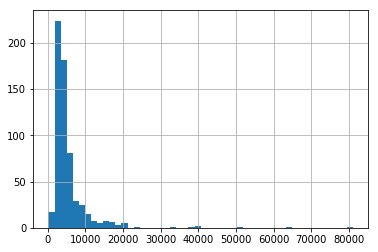

In [12]:
##Histograms :-
df['ApplicantIncome'].hist(bins = 50)

The above histogram shows that there are very few extreme values after 10000

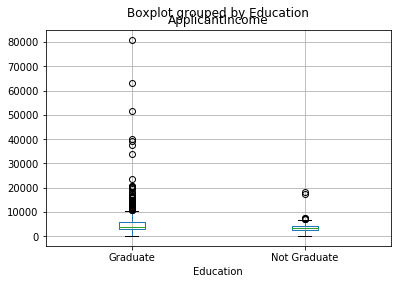

In [13]:
df.boxplot(column = 'ApplicantIncome', by='Education')

No major difference between mean income of graduates and non graduates,
however there are a large number of graduates with extremely higher income.

In [14]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc = lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)

print('\nProbability of getting loan for each credit history class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each credit history class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


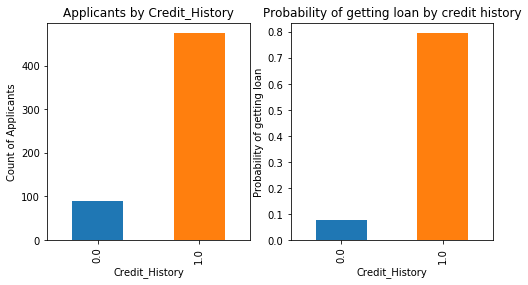

In [15]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

#Since plotting a pivot table into bar graph is problematic, the data in pivot table is converted to 
#a simple pandas series and then plotted
temp2 = {0.0:0.078652,1.0:0.795789}
temp2 = pd.Series(temp2)
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
temp2.plot(kind='bar')


This shows that is a person has a valid credit history, then his chances of getting a loan are
8-times more than that of a normal person.

Similarly pivot tables using various variables can be created and insights can be drawn from them.

From here on, the process of data munging is initiated.

In [17]:
df.apply(lambda x : sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The above values specify the number of missing values every particular column/variable

In [18]:
##Fill the loan amount missing values by mean

df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In the above cell, all the missing loan amount values are filled with the respective loan amount mean.
Another approach for filling mising values is seeing trends for LoanAmount for various groups such as Educaion and Self Employment using Boxplot and filling the missing values.

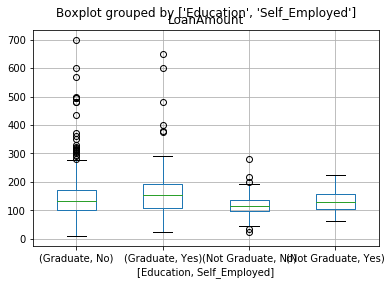

In [19]:
df.boxplot(column = 'LoanAmount', by=['Education','Self_Employed'])

We see that there is a difference in median values for different groups. Hence this information can be used to fill the missing values in loan amount, but for this project i am sticking with filling loan amount with mean values.

Filling self_employed missing values

In [20]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Since majority of Self_Employed values are 'No', fill the missing values with 'No'.

In [21]:
df['Self_Employed'].fillna('No',inplace=True)

Treat extreme values to loanamount by applying log transformation and storing it in a new column LoanAmount_log.

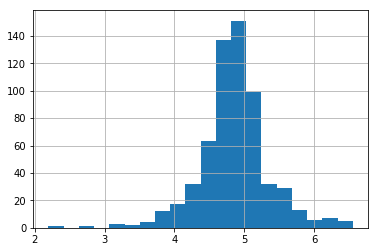

In [22]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Now,the Loan Amount distribution is normalized

Also Create a column TotalIncome that is sum of ApplicantIncome and CoApplicantIncome and then log tranform it to normalize it

In [23]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

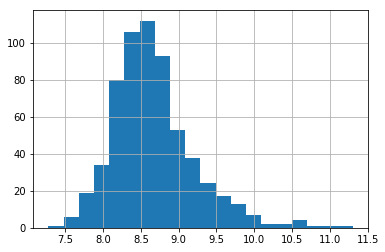

In [24]:
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [25]:
#Filling missing values:-
#Gender : Mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
#Married : Mode
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
#Dependents : Mode
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
#Loan_Amount_Term : Mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
#Credit_History : Mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [26]:
#Missing Values :
df.apply(lambda x : sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

Handling Categorical Data by LabelEncoder :-

In [27]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

Machine Learning algorithms :
Generic function to apply model, apply cross validation and also get accuracy scores.

In [44]:


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits=5)
  kf.get_n_splits(data[predictors])
  print(kf)
  error = []
  for train, test in kf.split(data[predictors]):
    # Filter training data
     train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
     train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
     model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
     error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])

First Model With Logistic Regression :

In [45]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
KFold(n_splits=5, random_state=None, shuffle=False)
Cross-Validation Score : 80.946%


Second Model With Decision Tree

In [48]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 89.414%
KFold(n_splits=5, random_state=None, shuffle=False)
Cross-Validation Score : 68.559%


Here we observe that using decision trees have increased the accuracy but decreased the cross-validation score.
This clearly implies a case of overfitting.

Third Model with Decision Trees

In [50]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model,df,predictor_var,outcome_var)


Accuracy : 100.000%
KFold(n_splits=5, random_state=None, shuffle=False)
Cross-Validation Score : 77.364%


From the above score we can tell that this is also a clear case of overfitting.
To improve this we need to perform a better feature selection.
We can do so by looking at feature importances generated by RandomForestClassifier.


In [51]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.269358
TotalIncome_log     0.265686
LoanAmount_log      0.225403
Dependents          0.053212
Property_Area       0.047716
Loan_Amount_Term    0.046589
Married             0.026251
Education           0.022565
Gender              0.021640
Self_Employed       0.021580
dtype: float64


Selecting the first 6 most importance features from the above list for random forest classifier.

In [54]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Dependents', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model,df,predictor_var,outcome_var)

Accuracy : 100.000%
KFold(n_splits=5, random_state=None, shuffle=False)
Cross-Validation Score : 78.992%


In [ ]:
from the above case of feature selection we improved the cross validation score, thereby generalizing the model